In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("kddcup99.csv", skipinitialspace = True)

In [4]:
df.shape #numar de linii si coloane

(494020, 42)

In [5]:
df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
436107,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf
388417,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.0,1.0,1.0,0.00,0.00,neptune
434686,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf
40705,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.0,0.0,0.0,0.04,0.04,back
308894,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf
481168,0,udp,private,SF,105,0,0,0,0,0,...,233,0.91,0.01,0.01,0.0,0.0,0.0,0.00,0.00,normal
43747,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf
381165,0,tcp,private,S0,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.0,1.0,1.0,0.00,0.00,neptune
46842,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf
197250,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.0,0.0,0.00,0.00,smurf


In [8]:
df['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [9]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(145585, 42)

In [10]:
df['label'].value_counts()

normal             87831
neptune            51820
back                 968
teardrop             918
satan                906
warezclient          893
ipsweep              651
smurf                641
portsweep            416
pod                  206
nmap                 158
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  19
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [7]:
df = df.drop('label', 1)


/var/folders/9m/k3vyv4317cz56g6f681k4jnm0000gn/T/ipykernel_54866/2870760215.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('label', 1)


/Users/eduard.hogea/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/eduard.hogea/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/eduard.hogea/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='src_bytes', ylabel='duration'>,
        <AxesSubplot:xlabel='dst_bytes', ylabel='duration'>, ...,
        <AxesSubplot:xlabel='dst_host_srv_serror_rate', ylabel='duration'>,
        <AxesSubplot:xlabel='dst_host_rerror_rate', ylabel='duration'>,
        <AxesSubplot:xlabel='dst_host_srv_rerror_rate', ylabel='duration'>],
       [<AxesSubplot:xlabel='duration', ylabel='src_bytes'>,
        <AxesSubplot:xlabel='src_bytes', ylabel='src_bytes'>,
        <AxesSubplot:xlabel='dst_bytes', ylabel='src_bytes'>, ...,
        <AxesSubplot:xlabel='dst_host_srv_serror_rate', ylabel='src_bytes'>,
        <AxesSubplot:xlabel='dst_host_rerror_rate', ylabel='src_bytes'>,
        <AxesSubplot:xlabel='dst_host_srv_rerror_rate', ylabel='src_bytes'>],
       [<AxesSubplot:xlabel='duration', ylabel='dst_bytes'>,
        <AxesSubplot:xlabel='src_bytes', ylabel='dst_bytes'>,
        <AxesSubplot:xlabel='dst_bytes', ylabel

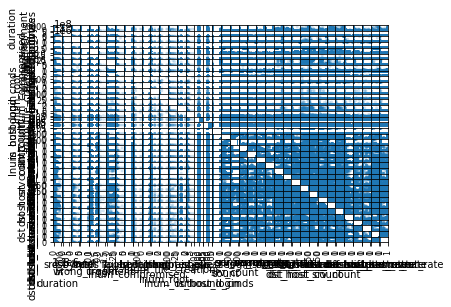

In [3]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df, alpha=0.2)


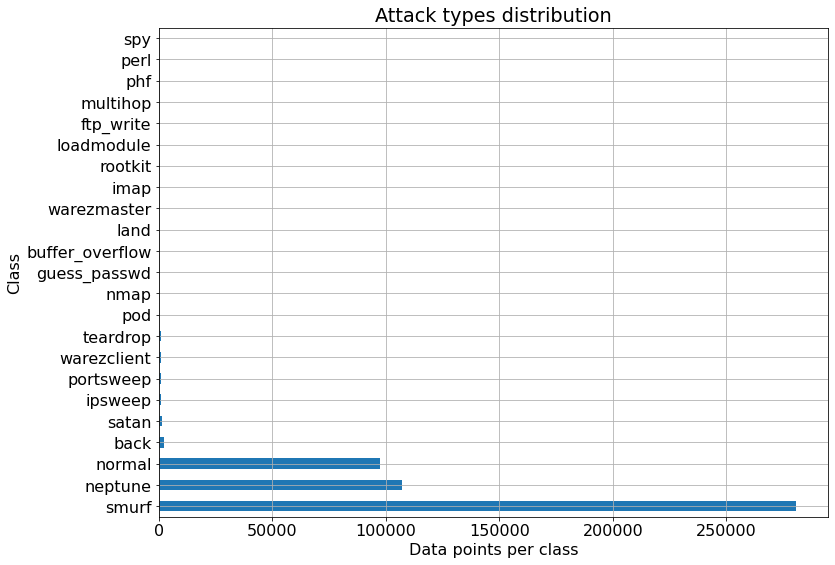

In [23]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Attack types distribution')

plt.grid()
plt.show()

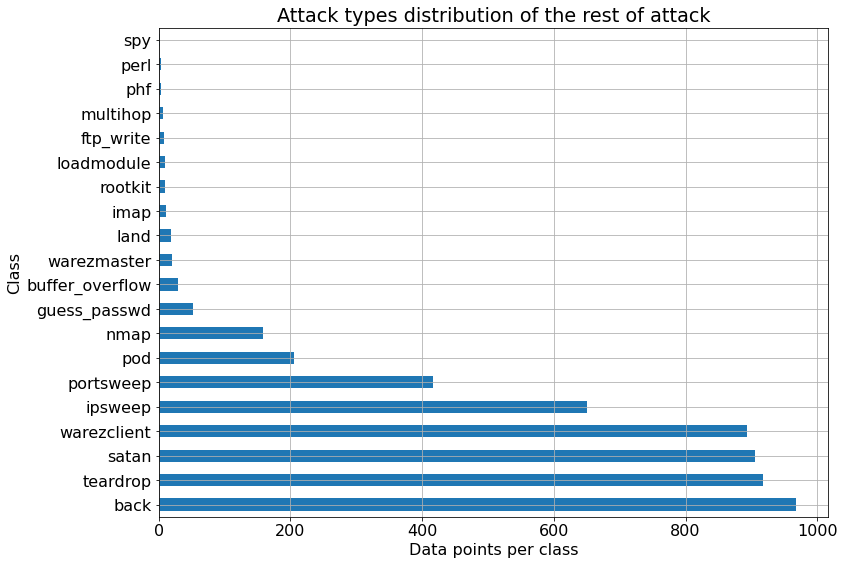

In [27]:
df.drop(df.loc[df['label']=="normal"].index, inplace=True)
df.drop(df.loc[df['label']=="neptune"].index, inplace=True)
df.drop(df.loc[df['label']=="smurf"].index, inplace=True)
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Attack types distribution of the rest of attack')
plt.grid()
plt.show()

Null values in dataset are 0


(145585, 42)

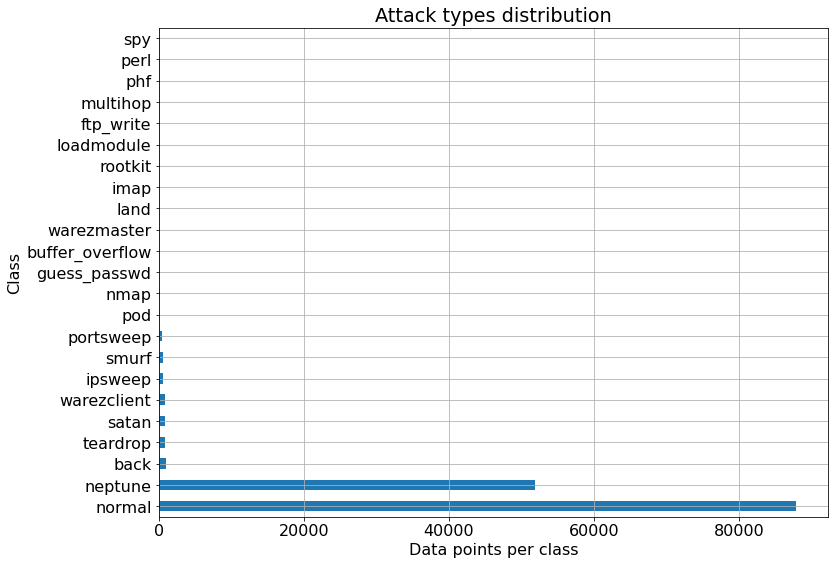

In [31]:

plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 16})
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='barh')
plt.xlabel('Data points per class')
plt.ylabel('Class')
plt.title('Attack types distribution')
plt.grid()
plt.show()

In [8]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal


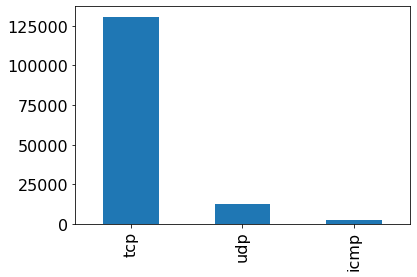

In [9]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

bar_graph('protocol_type')

/var/folders/9m/k3vyv4317cz56g6f681k4jnm0000gn/T/ipykernel_38860/486289710.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


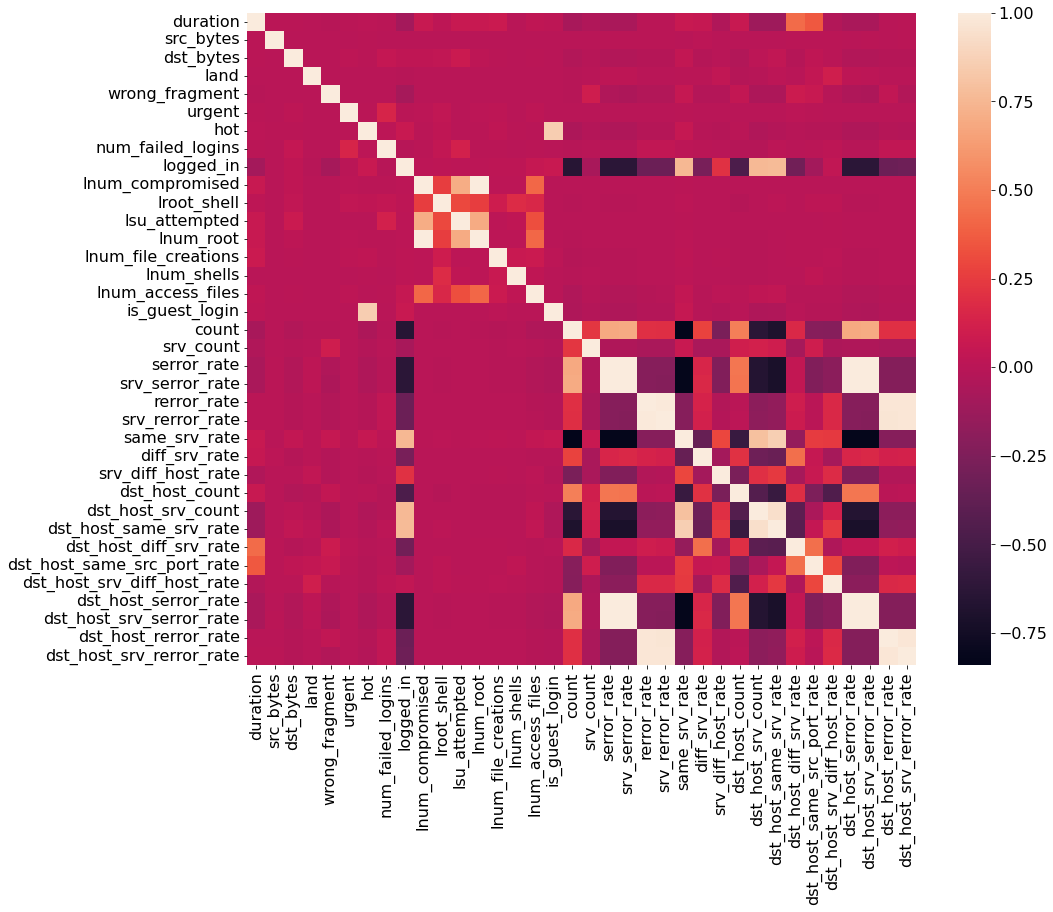

In [10]:
# drop columns with NaN
df = df.dropna('columns')

# keep columns where there are more than 1 unique values
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [1]:
df.sample()

NameError: name 'df' is not defined